In [1]:
!pip install ucimlrepo

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Step 1: Fetch the Iris dataset
iris = fetch_ucirepo(id=53)

# Step 2: Extract features and target variables
X = iris.data.features
y = iris.data.targets

# Step 3: Metadata and variable information (for understanding the dataset)
print(iris.metadata)
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

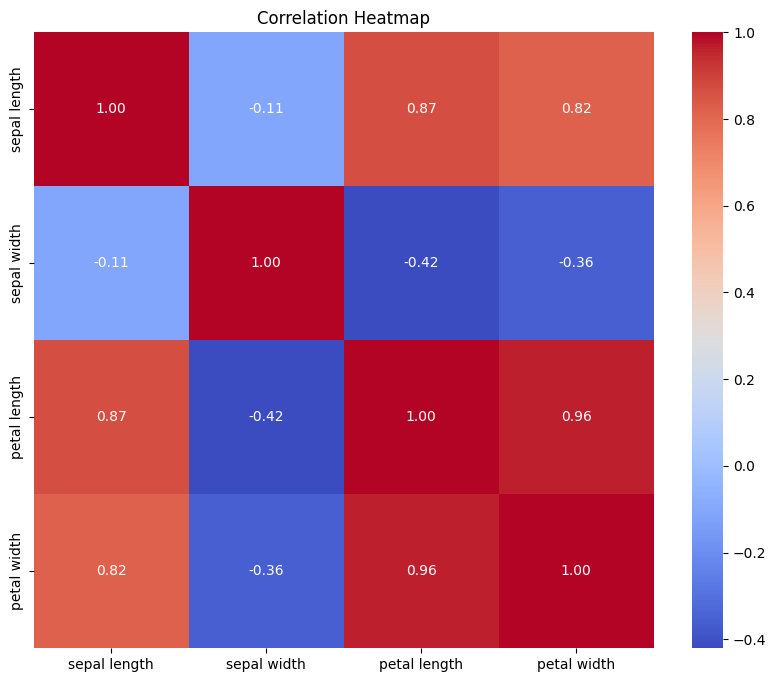

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# Step 4: Correlation Heatmap (Before Training) - Exclude target variable
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Encode the target variable (if you want to include it in the model)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [10]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Helper function to create a model pipeline
def build_model(model):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    return pipeline

# Initialize models
models = {
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

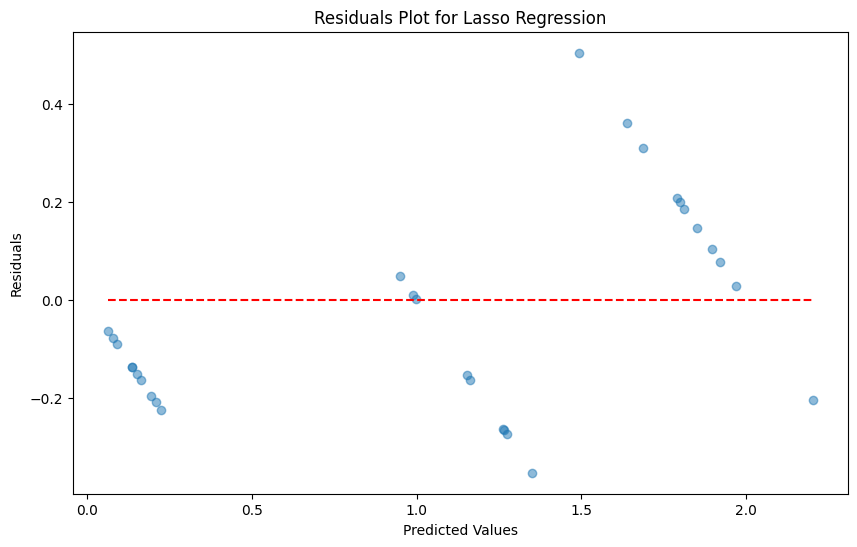

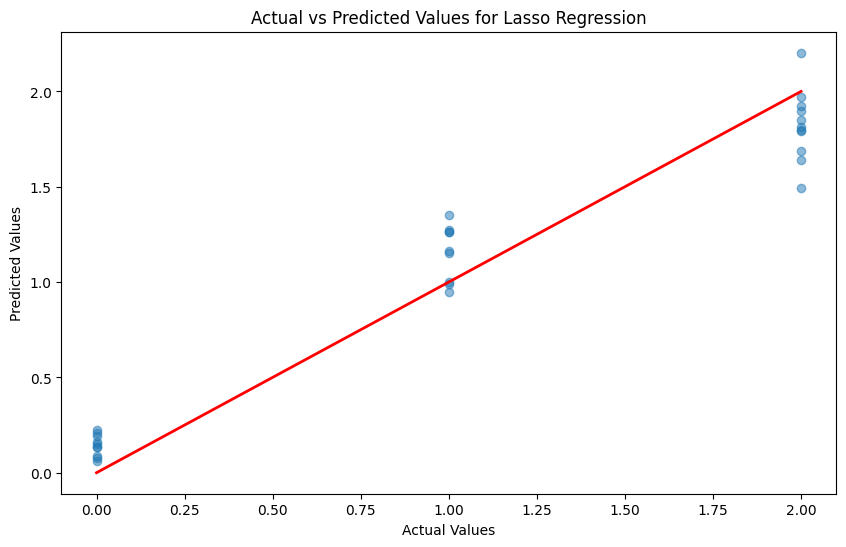

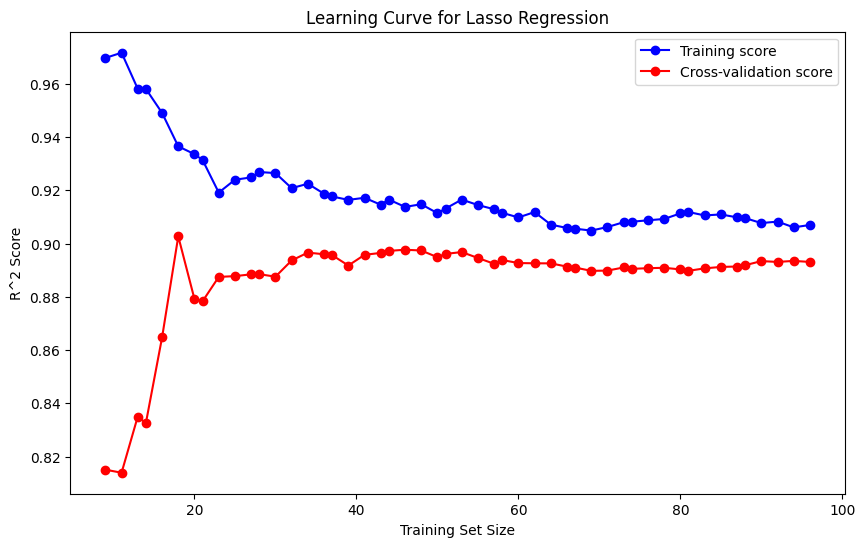

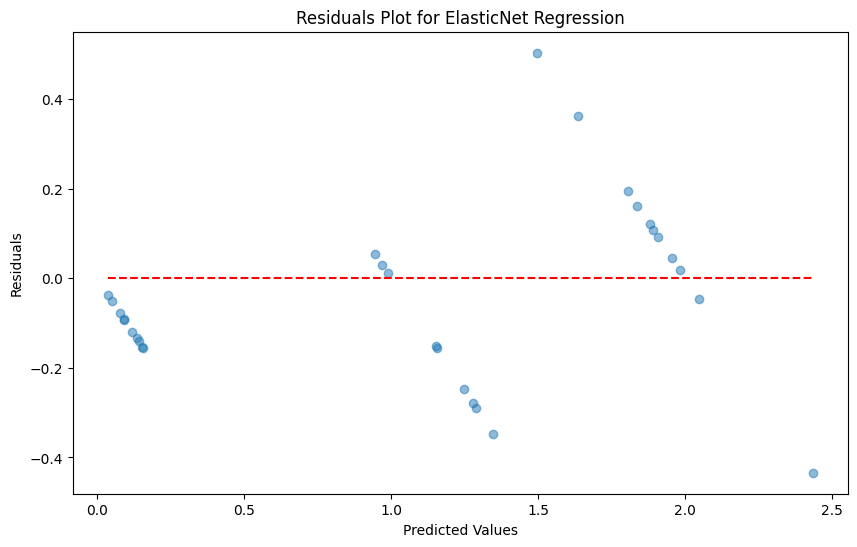

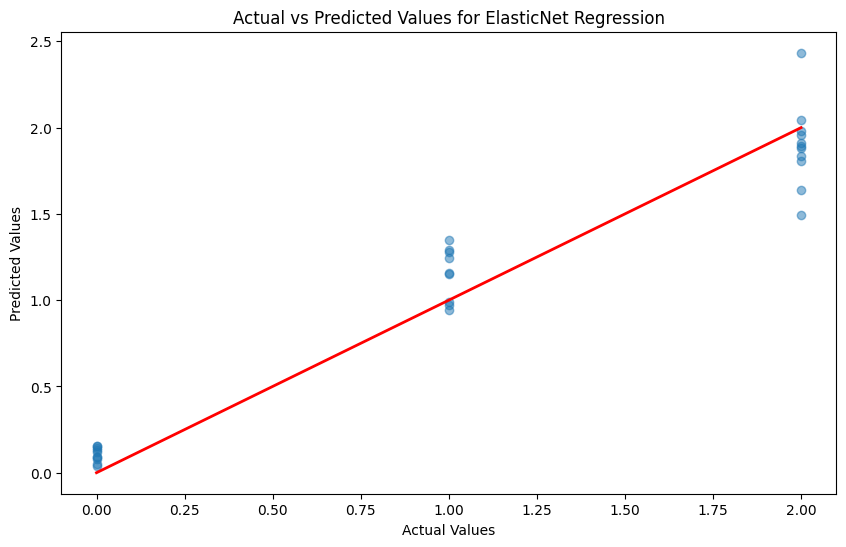

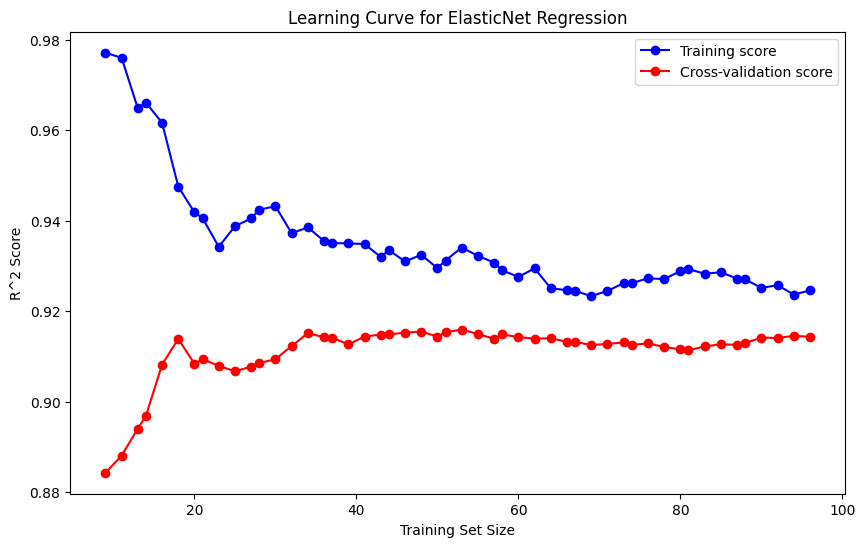

In [11]:
# Sequential steps to train models and generate plots
for name, model in models.items():
    # Step 7: Train the model
    pipeline = build_model(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Step 8: Residuals Plot (After Training)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {name}")
    plt.show()

    # Step 9: Prediction vs. Actual Plot (After Training)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted Values for {name}")
    plt.show()

    # Step 10: Learning Curve (Training Progress)
    train_sizes, train_scores, test_scores = learning_curve(
        pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')

    plt.title(f"Learning Curve for {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("R^2 Score")
    plt.legend(loc="best")
    plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Sequential steps to train models and generate metrics
for name, model in models.items():
    # Train the model
    pipeline = build_model(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)  # Corrected this line
    r2 = r2_score(y_test, y_pred)
    cross_val_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()

    # Print metrics
    print(f"{name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")
    print(f"Cross-Validation R^2 Score: {cross_val_r2}")
    print("-" * 40)


Lasso Regression Metrics:
Mean Squared Error (MSE): 0.04362839137912218
Root Mean Squared Error (RMSE): 0.20887410413721033
Mean Absolute Error (MAE): 0.1770851019110111
R^2 Score: 0.9375746387262163
Cross-Validation R^2 Score: 0.8931248441959454
----------------------------------------
ElasticNet Regression Metrics:
Mean Squared Error (MSE): 0.039988084710089584
Root Mean Squared Error (RMSE): 0.19997020955654765
Mean Absolute Error (MAE): 0.15689461823627104
R^2 Score: 0.9427833446119545
Cross-Validation R^2 Score: 0.9143220996607833
----------------------------------------
